## Homework 2 (CSCE 633 600, Machine Learning):

### Name: Rohan Chaudhury 
### UIN: 432001358

# Question 2: Machine learning with Pokemon GO
Recent studies have found that novel mobile games can lead to increased physical activity. A
notable example is Pokemon Go, a mobile game combining the Pokemon world through augmented reality with the real world requiring players to physically move around. Specifically,
in the following study, researchers have found that Pokemon Go leads to increased levels of
physical activity for the most engaged players!

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5174727/

In this problem, our goal is to predict the combat points of each pokemon in the 2017 Pokemon
Go mobile game. Each pokemon has its own unique attributes that can help predicting its
combat points. These include:

1. Stamina
2. Attack value
3. Defense value
4. Capture rate
5. Flee rate
6. Spawn chance
7. Primary strength

Inside the \Homework 2" folder on CANVAS you will find the data file (named \hw2 data.csv")
that will be used for our experiments. The rows of these files refer to the data samples (i.e.,
pokemon samples), while the columns denote the name of the pokemon (column 1), its attributes
(columns 2-8), and the combat point outcome (column 9). You can ignore column 1 for the rest
of this problem.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import collections
import numpy as np

file_train="hw2_data.csv"


train_rows =pd.read_csv(file_train)
print (train_rows.head())

print ("  ")
print("Total no. of rows in hw2_data.csv: %d \n"%(len(train_rows)))

print ("  ")
print("Total no. of colums in hw2_data.csv: %d \n"%(train_rows.shape[1]))

         name  stamina  attack_value  defense_value  capture_rate  flee_rate  \
0   Bulbasaur       90           126            126          0.16       0.10   
1     Ivysaur      120           156            158          0.08       0.07   
2    Venusaur      160           198            200          0.04       0.05   
3  Charmander       78           128            108          0.16       0.10   
4  Charmeleon      116           160            140          0.08       0.07   

   spawn_chance primary_strength  combat_point  
0          69.0            Grass          1079  
1           4.2            Grass          1643  
2           1.7            Grass          2598  
3          25.3             Fire           962  
4           1.2             Fire          1568  
  
Total no. of rows in hw2_data.csv: 146 

  
Total no. of colums in hw2_data.csv: 9 



### **(i) (0.5 point) Data exploration:** Which are categorical and which are numerical attributes (columns 2-8) of this dataset?



**Answer:**

From the given dataset we can see that the numerical attributes are:

1. stamina
2. attack_value
3. defense_value
4. capture_rate
5. flee_rate
6. spawn_chance

The only categorical attributes is:

1. primary_strength


### (ii) (0.5 point) Data exploration: Plot 2-D scatter plots and compute the Pearson's correlation coefficient between the numerical attributes and the outcome of interest. Which attributes would be the most predictive of the outcome of combat points? 

#### Note: The Pearson's correlation coefficient is a measure of linear association between two variables. It ranges between -1 and 1, with values closer to 1 indicating high degree of association between a feature and the outcome. For more details, see this link: https://en.wikipedia.org/wiki/Pearson_correlation_coefficient. You can use any available library to compute this metric.

#### Answer:

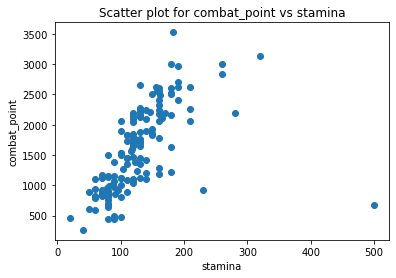

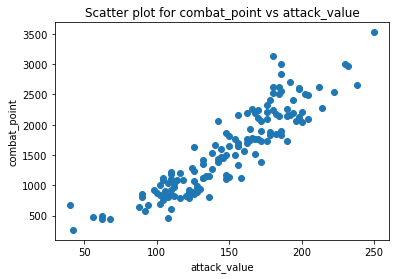

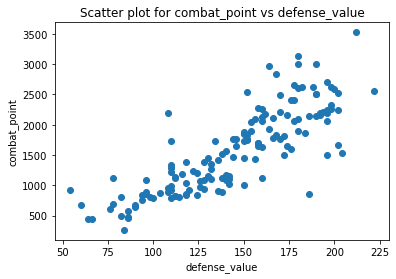

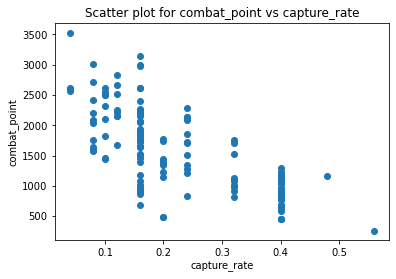

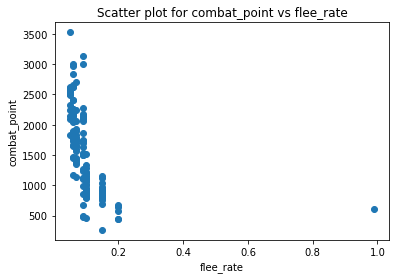

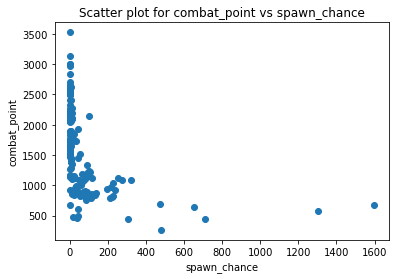

Pearson's correlation coefficient between combat_point and stamina is : 0.5828317032229263
Pearson's correlation coefficient between combat_point and attack_value is : 0.9075315401042737
Pearson's correlation coefficient between combat_point and defense_value is : 0.8262293053572933
Pearson's correlation coefficient between combat_point and capture_rate is : -0.7430078083529396
Pearson's correlation coefficient between combat_point and flee_rate is : -0.4070342114215964
Pearson's correlation coefficient between combat_point and spawn_chance is : -0.42132699465983614


In [2]:


for i in range(1,train_rows.shape[1]-2):
    
    plt.figure(1)
    plt.scatter(x=train_rows.iloc[:,i],y=train_rows.iloc[:,-1])
    plt.xlabel(train_rows.columns[i])
    plt.ylabel(train_rows.columns[-1])
    plt.title('Scatter plot for {} vs {}'.format (train_rows.columns[-1], train_rows.columns[i]))
    plt.show()
    
    
for i in range(1,train_rows.shape[1]-2):
    correlation=train_rows.iloc[:,[i,-1]].corr(method='pearson')
    
    print ("Pearson's correlation coefficient between {} and {} is : {}".format(train_rows.columns[-1], train_rows.columns[i], correlation.iloc[0,1]))


The scatterplots are plotted as shown above.

Pearson's correlation coefficient is as follows:<br>
1. Pearson's correlation coefficient between combat_point and stamina is : **0.5828317032229263**<br>
2. Pearson's correlation coefficient between combat_point and attack_value is : **0.9075315401042737**<br>
3. Pearson's correlation coefficient between combat_point and defense_value is : **0.8262293053572933**<br>
4. Pearson's correlation coefficient between combat_point and capture_rate is : **-0.7430078083529396**<br>
5. Pearson's correlation coefficient between combat_point and flee_rate is : **-0.4070342114215964**<br>
6. Pearson's correlation coefficient between combat_point and spawn_chance is : **-0.42132699465983614**<br>


So from the scatterplots and the correlation coefficients we can see that **attack_value** is the most predictive of the outcome of combat points.

### (iii) (0.5 point) Data exploration: Plot 2-D scatter plots and compute the Pearson's correlation coefficient between the numerical attributes themselves. Which variables are the most correlated to each other?

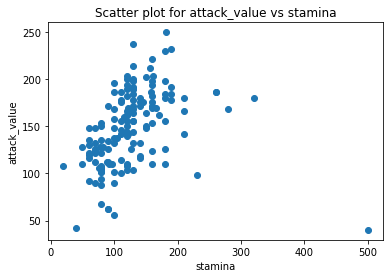

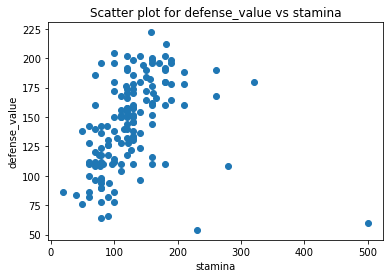

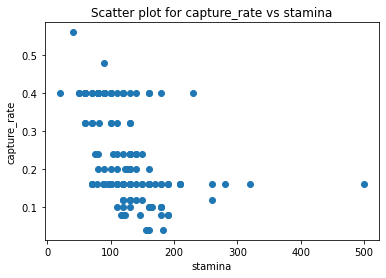

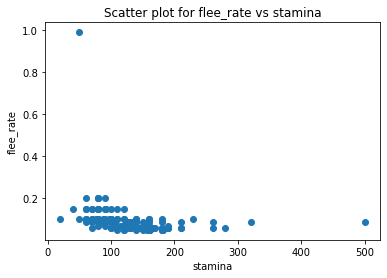

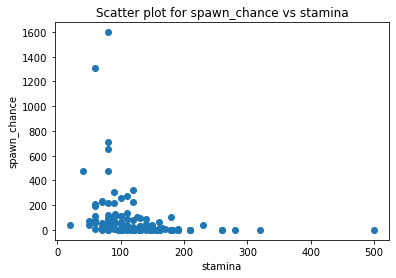

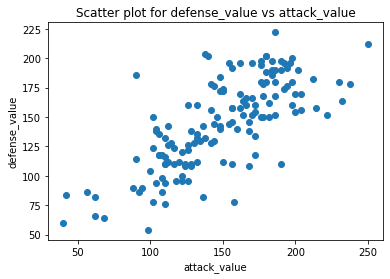

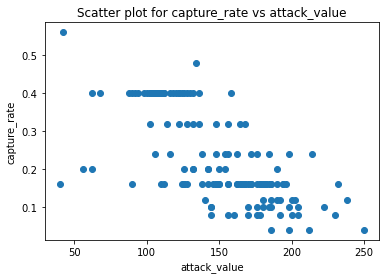

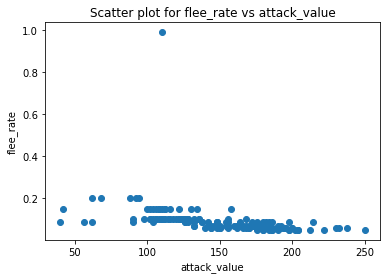

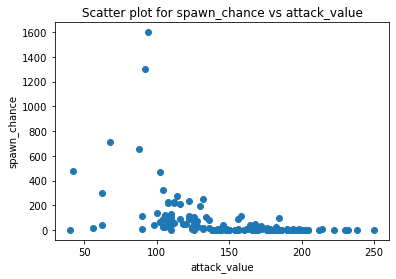

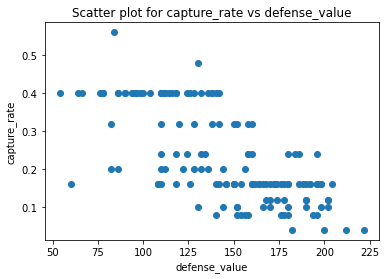

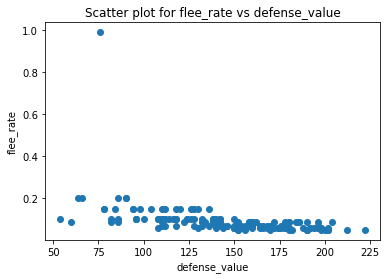

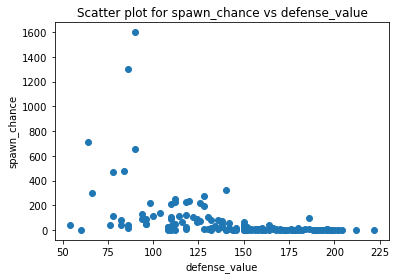

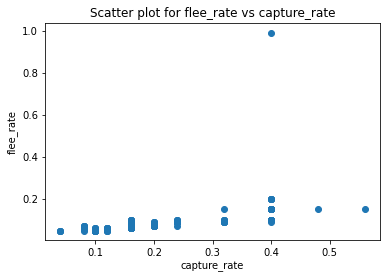

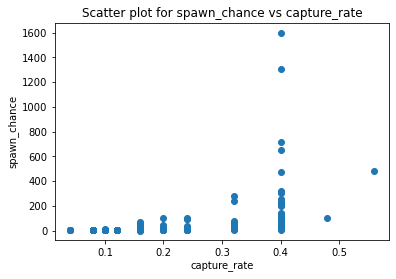

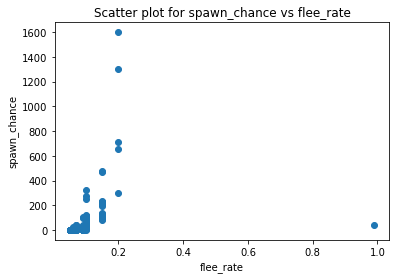

Pearson's correlation coefficient between attack_value and stamina is : 0.30299498267389147
Pearson's correlation coefficient between defense_value and stamina is : 0.3026633362536891
Pearson's correlation coefficient between capture_rate and stamina is : -0.4468503047144601
Pearson's correlation coefficient between flee_rate and stamina is : -0.27104753932483916
Pearson's correlation coefficient between spawn_chance and stamina is : -0.2764202078836037
Pearson's correlation coefficient between defense_value and attack_value is : 0.736776646751523
Pearson's correlation coefficient between capture_rate and attack_value is : -0.6905726716022139
Pearson's correlation coefficient between flee_rate and attack_value is : -0.36906414197600684
Pearson's correlation coefficient between spawn_chance and attack_value is : -0.43264844020108695
Pearson's correlation coefficient between capture_rate and defense_value is : -0.6972657162131649
Pearson's correlation coefficient between flee_rate and de

In [3]:
for i in range(1,train_rows.shape[1]-2):
    for j in range(i+1,train_rows.shape[1]-2):
        plt.figure(1)
        plt.scatter(x=train_rows.iloc[:,i],y=train_rows.iloc[:,j])
        plt.xlabel(train_rows.columns[i])
        plt.ylabel(train_rows.columns[j])
        plt.title('Scatter plot for {} vs {}'.format (train_rows.columns[j], train_rows.columns[i]))
        plt.show()

for i in range(1,train_rows.shape[1]-2):
    for j in range(i+1,train_rows.shape[1]-2):

        correlation=train_rows.iloc[:,[i,j]].corr(method='pearson')

        print ("Pearson's correlation coefficient between {} and {} is : {}".format(train_rows.columns[j], train_rows.columns[i], correlation.iloc[0,1]))


### Answer:

The scatterplots are plotted as shown above.

Pearson's correlation coefficient is as follows:

1. Pearson's correlation coefficient between attack_value and stamina is : 0.30299498267389147
2. Pearson's correlation coefficient between defense_value and stamina is : 0.3026633362536891
3. Pearson's correlation coefficient between capture_rate and stamina is : -0.4468503047144601
4. Pearson's correlation coefficient between flee_rate and stamina is : -0.27104753932483916
5. Pearson's correlation coefficient between spawn_chance and stamina is : -0.2764202078836037
6. Pearson's correlation coefficient between defense_value and attack_value is : 0.736776646751523
7. Pearson's correlation coefficient between capture_rate and attack_value is : -0.6905726716022139
8. Pearson's correlation coefficient between flee_rate and attack_value is : -0.36906414197600684
9. Pearson's correlation coefficient between spawn_chance and attack_value is : -0.43264844020108695
10. Pearson's correlation coefficient between capture_rate and defense_value is : -0.6972657162131649
11. Pearson's correlation coefficient between flee_rate and defense_value is : -0.4238597562372931
12. Pearson's correlation coefficient between spawn_chance and defense_value is : -0.43249856208332005
13. Pearson's correlation coefficient between flee_rate and capture_rate is : 0.44051150728059496
14. Pearson's correlation coefficient between spawn_chance and capture_rate is : 0.47279272664456795
15. Pearson's correlation coefficient between spawn_chance and flee_rate is : 0.29322169222082034

So from the scatterplots and the correlation coefficients we can see that **defense_value** and **attack_value** with Pearson's correlation coefficient **0.73677** are the most correlated to each other.

### (iv) (1 point) Pre-processing of categorical variables: Categorical variables require special attention because usually they cannot be the input of regression models as they are. A potential way to treat categorical variables is to simply convert each value of the variable to a separate number. However, this might impute non-existent relative associations between the values, which might not always be representative of the data (e.g., if we assign "1" to the value "green" and '2" to the value "red", the regression algorithm will assume that "red" is greater than "green," which is not necessarily the case). For this reason, we can use a "one hot encoding" to represent categorical variables. According to this, we will create a binary column for each category of the categorical variable, which will take a value of 1 if the sample belongs to that category, and 0 otherwise. For each categorical variable of the problem, count the number of different values and implement the one hot encoding. For the remaining of the problem, you will be working with the one hot encoding of the categorical variables.

### Note: You can find more information on different types of pre-processing categorical variables in the following links:

https://pbpython.com/categorical-encoding.html

https://stats.idre.ucla.edu/spss/faq/coding-systems-for-categorical-variables-in-regression-analysis-2/

In [4]:
strength_categories=list(collections.Counter(train_rows["primary_strength"]).keys())
# print (strength_categories)

for category in strength_categories:
    train_rows[category]=0

for i in range(len(train_rows)):
    train_rows.loc[i,train_rows.loc[i,"primary_strength"]]=1

col_to_show=["name","primary_strength"]

for category in strength_categories:
    col_to_show.append(category)
    
print (train_rows.loc[:10, col_to_show ])

          name primary_strength  Grass  Fire  Water  Bug  Normal  Poison  \
0    Bulbasaur            Grass      1     0      0    0       0       0   
1      Ivysaur            Grass      1     0      0    0       0       0   
2     Venusaur            Grass      1     0      0    0       0       0   
3   Charmander             Fire      0     1      0    0       0       0   
4   Charmeleon             Fire      0     1      0    0       0       0   
5    Charizard             Fire      0     1      0    0       0       0   
6     Squirtle            Water      0     0      1    0       0       0   
7    Wartortle            Water      0     0      1    0       0       0   
8    Blastoise            Water      0     0      1    0       0       0   
9     Caterpie              Bug      0     0      0    1       0       0   
10     Metapod              Bug      0     0      0    1       0       0   

    Electric  Ground  Fairy  Fighting  Psychic  Rock  Ghost  Ice  Dragon  
0          0

### Answer:

"One hot encoding" is implemented as shown above to represent the categorical variable **"primary_strength"**.

### (v) (1.5 points) Predicting combat points: The goal of this question is to predict the combat points using the numerical attributes, as well as the categorical attributes that were pre-processed with the one hot encoding process. Implement a linear regression model using the ordinary least squares (OLS) solution. How many parameters does the model have? To test your model, randomly split the data into 5 folds and use a 5-fold cross-validation. For each fold compute the square root of the residual sum of squares error (RSS) between the actual and predicted outcome variable. Also compute the average square roof of the RSS over all folds.

In [5]:
#Adding Bias

train_rows["bias"]=1.0

feature_set=["bias","stamina","attack_value","defense_value","capture_rate", "flee_rate","spawn_chance"]

for category in strength_categories:
    feature_set.append(category)
    
X_train=train_rows.loc[:,feature_set]
X_train[:5]


,bias,stamina,attack_value,defense_value,capture_rate,flee_rate,spawn_chance,Grass,Fire,Water,...,Poison,Electric,Ground,Fairy,Fighting,Psychic,Rock,Ghost,Ice,Dragon
0,1.0,90,126,126,0.16,0.10,69.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.0,120,156,158,0.08,0.07,4.2,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.0,160,198,200,0.04,0.05,1.7,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,78,128,108,0.16,0.10,25.3,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1.0,116,160,140,0.08,0.07,1.2,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:

Y_train=train_rows.loc[:,"combat_point"]
Y_train[:5]

0    1079
1    1643
2    2598
3     962
4    1568
Name: combat_point, dtype: int64

In [7]:
X_matrix=X_train.to_numpy()
Y_matrix=Y_train.to_numpy()

In [8]:
#linear regression model using the ordinary least squares (OLS) solution

#(X^T*X)^(-1)(X^T*Y)

def get_weights(X_matrix, Y_matrix, print_length=False):
    XTX=np.matmul(X_matrix.T,X_matrix)
    XTXinv=np.linalg.pinv(XTX)
    XTXinvXT=np.matmul(XTXinv, X_matrix.T)
    weight_matrix=np.matmul(XTXinvXT, Y_matrix)
    if print_length:
        print ("Length of weight matrix: {}".format(len(weight_matrix)))
    return weight_matrix

#Function to calculate square root of RSS

def get_root_rss(Y_pred,Y_test):
    rss=0
    for i,j in zip(Y_pred,Y_test):
        
        rss+=(i-j)**2
    
    return np.sqrt(rss)

#Function to randomly shuffle X_matrix and Y_matrix
import random
def random_shuffle(X_matrix, Y_matrix):
    total_matrix=np.c_[ X_matrix, Y_matrix ] 
#     np.random.seed(42)
    np.random.shuffle(total_matrix)
#     print (total_matrix.shape)
    X=total_matrix[:,:-1]
    Y=total_matrix[:,-1]
    return X,Y


In [9]:
# Randomly shuffling the data:

X_matrix,Y_matrix=random_shuffle(X_matrix, Y_matrix)

In [10]:




#function to get cross validation 

def crossvalidation(X_matrix, Y_matrix, nfolds, print_rss=False):
    fold_size=int(len(Y_matrix)/nfolds)+1
    rss_values=[]
    
    for i in range(0, len(Y_matrix), fold_size):
        if (i!=0):
#             print (i)
            X_train=np.concatenate((X_matrix[:i],X_matrix[i+fold_size:]))
            
            Y_train=np.concatenate((Y_matrix[:i],Y_matrix[i+fold_size:]))
            
            X_test=X_matrix[i:i+fold_size]
            
            Y_test=Y_matrix[i:i+fold_size]
#             print(X_train.shape)
#             print (Y_train.shape)
#             print(X_test.shape)
#             print(Y_test.shape)

        else:
            X_train=X_matrix[fold_size:]
            Y_train=Y_matrix[fold_size:]
            X_test=X_matrix[:+fold_size]
            Y_test=Y_matrix[:+fold_size]
#             print(X_train.shape)
#             print (Y_train.shape)
#             print(X_test.shape)
#             print(Y_test.shape)
    
        weight_matrix=get_weights(X_train,Y_train)
#         print (weight_matrix)
        Y_pred=np.matmul(X_test,weight_matrix)
#         print (Y_pred)
        rss=get_root_rss(Y_pred,Y_test)
        rss_values.append(rss)
        if print_rss:
            print ("The square root of the residual sum of squares error (RSS) between the actual and predicted outcome variable for the fold number {} is {}".format(int(i/fold_size)+1,rss))
            print ("   ")
    avg_sqrt_rss=sum(rss_values)/len(rss_values)
    print ("The average square root of the residual sum of squares error (RSS) over all folds after randomly shuffling the data is: {}".format(avg_sqrt_rss))
    return avg_sqrt_rss

In [11]:
avg_sqrt_rss=crossvalidation(X_matrix, Y_matrix, 5, print_rss=True)


The square root of the residual sum of squares error (RSS) between the actual and predicted outcome variable for the fold number 1 is 1704.85736075306
   
The square root of the residual sum of squares error (RSS) between the actual and predicted outcome variable for the fold number 2 is 830.4528088937259
   
The square root of the residual sum of squares error (RSS) between the actual and predicted outcome variable for the fold number 3 is 800.8422288841426
   
The square root of the residual sum of squares error (RSS) between the actual and predicted outcome variable for the fold number 4 is 649.3304757583159
   
The square root of the residual sum of squares error (RSS) between the actual and predicted outcome variable for the fold number 5 is 593.3656557299302
   
The average square root of the residual sum of squares error (RSS) over all folds after randomly shuffling the data is: 915.7697060038348


### Answer:

A linear regression model using the ordinary least squares (OLS) solution is implemented as shown above.

The model has **22** parameters which is the length of the weight matrix.

The data has been randomly split into 5 folds and a 5-fold cross-validation has been used to test the model. For each fold:


The square root of the residual sum of squares error (RSS) between the actual and predicted outcome variable for the fold number 1 is 598.0581895806191


The square root of the residual sum of squares error (RSS) between the actual and predicted outcome variable for the fold number 2 is 760.180186852635
   

The square root of the residual sum of squares error (RSS) between the actual and predicted outcome variable for the fold number 3 is 1679.7855687086267
   

The square root of the residual sum of squares error (RSS) between the actual and predicted outcome variable for the fold number 4 is 678.0546177636126
   

The square root of the residual sum of squares error (RSS) between the actual and predicted outcome variable for the fold number 5 is 1229.0736768609897



The average square root of the residual sum of squares error (RSS) over all folds after randomly shuffling the data is: 989.0304479532966

### (vi) (1 point) Predicting combat points: Repeat the same experiment as in question (v), but instead of linear regression, implement linear regression with l2-norm regularization. Experiment and report your results with different values of the regularization term $\lambda$. 

### Note: You can use libraries for matrix operations and random sampling, but please implement the regularized linear regression algorithm, the 5-fold cross-validation process, and the RSS error computation.

In [12]:
def get_weights_regularized(X_matrix, Y_matrix, lmbd, print_length=False):
    XTX=np.matmul(X_matrix.T,X_matrix)
#     print(XTX.shape)
    identity=np.identity(XTX.shape[0])
    reg=lmbd*identity
#     print (reg)
    XTXinv=np.linalg.pinv(XTX+reg)
    XTXinvXT=np.matmul(XTXinv, X_matrix.T)
    weight_matrix=np.matmul(XTXinvXT, Y_matrix)
    if print_length:
        print ("Length of Parameter vector: {}".format(len(weight_matrix)))
    return weight_matrix



def crossvalidation_regularized(X_matrix, Y_matrix, nfolds, lmbd, print_vector=False, print_rss=False):
    fold_size=int(len(Y_matrix)/nfolds)+1
    rss_values=[]
    print (" ")
    print ("Taking regularization parameter lambda = {}".format(lmbd))
    print (" ")
    for i in range(0, len(Y_matrix), fold_size):
        if (i!=0):
#             print (i)
            X_train=np.concatenate((X_matrix[:i],X_matrix[i+fold_size:]))
            
            Y_train=np.concatenate((Y_matrix[:i],Y_matrix[i+fold_size:]))
            
            X_test=X_matrix[i:i+fold_size]
            
            Y_test=Y_matrix[i:i+fold_size]
#             print(X_train.shape)
#             print (Y_train.shape)
#             print(X_test.shape)
#             print(Y_test.shape)

        else:
            X_train=X_matrix[fold_size:]
            Y_train=Y_matrix[fold_size:]
            X_test=X_matrix[:+fold_size]
            Y_test=Y_matrix[:+fold_size]
#             print(X_train.shape)
#             print (Y_train.shape)
#             print(X_test.shape)
#             print(Y_test.shape)
    
        weight_matrix=get_weights_regularized(X_train,Y_train,lmbd)
        if print_vector:
            print ("The Parameter vector: {}".format(weight_matrix))
        Y_pred=np.matmul(X_test,weight_matrix)
#         print (Y_pred)
        rss=get_root_rss(Y_pred,Y_test)
        rss_values.append(rss)
        if print_rss:
            print ("The square root of the residual sum of squares error (RSS) between the actual and predicted outcome variable for the fold number {} is {}".format(int(i/fold_size)+1,rss))
            print ("   ")
    avg_sqrt_rss=sum(rss_values)/len(rss_values)
    print ("The average square root of the residual sum of squares error (RSS) over all folds after randomly shuffling the data is: {}".format(avg_sqrt_rss))
    return avg_sqrt_rss

In [13]:

lambda_values=[0,0.001,0.01,0.1,1,10,100,1000]

In [14]:
def get_avg_sqrt_rss_values(X_matrix, Y_matrix, nfold, lambda_values,  print_vector=False, print_rss=False):
    avg_sqrt_rss_values=[]
    for lmbd in lambda_values:
        val=crossvalidation_regularized(X_matrix, Y_matrix, nfold, lmbd, print_vector, print_rss)
        avg_sqrt_rss_values.append(val)
    return avg_sqrt_rss_values  
avg_sqrt_rss_values=get_avg_sqrt_rss_values(X_matrix, Y_matrix, 5, lambda_values,  print_vector=False, print_rss=False)

 
Taking regularization parameter lambda = 0
 
The average square root of the residual sum of squares error (RSS) over all folds after randomly shuffling the data is: 915.7697060038348
 
Taking regularization parameter lambda = 0.001
 
The average square root of the residual sum of squares error (RSS) over all folds after randomly shuffling the data is: 915.0717362392359
 
Taking regularization parameter lambda = 0.01
 
The average square root of the residual sum of squares error (RSS) over all folds after randomly shuffling the data is: 911.0889049448393
 
Taking regularization parameter lambda = 0.1
 
The average square root of the residual sum of squares error (RSS) over all folds after randomly shuffling the data is: 909.189314019695
 
Taking regularization parameter lambda = 1
 
The average square root of the residual sum of squares error (RSS) over all folds after randomly shuffling the data is: 955.3116803051123
 
Taking regularization parameter lambda = 10
 
The average square 

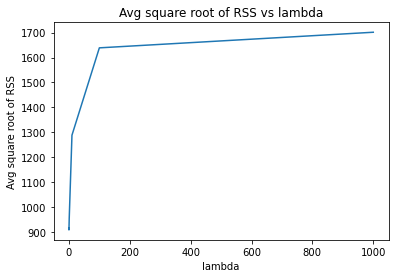

In [15]:
def plot_rss_vs_lambda(avg_sqrt_rss_values, lambda_values):
    plt.figure(1)
    plt.plot(lambda_values,avg_sqrt_rss_values )
    y_label="Avg square root of RSS"
    x_label="lambda"
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title('{} vs {}'.format (y_label,x_label ))
    plt.show()

# print(avg_sqrt_rss_values)
plot_rss_vs_lambda(avg_sqrt_rss_values, lambda_values)

In [16]:
lambda_values=[0,0.001,0.01,0.1,0.5,1]
avg_sqrt_rss_values=get_avg_sqrt_rss_values(X_matrix, Y_matrix, 5, lambda_values, print_vector=False, print_rss=False)


 
Taking regularization parameter lambda = 0
 
The average square root of the residual sum of squares error (RSS) over all folds after randomly shuffling the data is: 915.7697060038348
 
Taking regularization parameter lambda = 0.001
 
The average square root of the residual sum of squares error (RSS) over all folds after randomly shuffling the data is: 915.0717362392359
 
Taking regularization parameter lambda = 0.01
 
The average square root of the residual sum of squares error (RSS) over all folds after randomly shuffling the data is: 911.0889049448393
 
Taking regularization parameter lambda = 0.1
 
The average square root of the residual sum of squares error (RSS) over all folds after randomly shuffling the data is: 909.189314019695
 
Taking regularization parameter lambda = 0.5
 
The average square root of the residual sum of squares error (RSS) over all folds after randomly shuffling the data is: 930.8062018439014
 
Taking regularization parameter lambda = 1
 
The average square

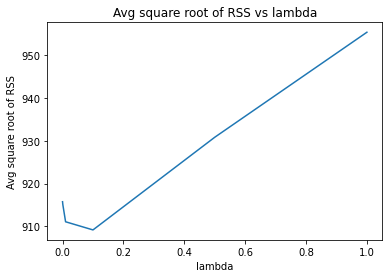

In [17]:
plot_rss_vs_lambda(avg_sqrt_rss_values, lambda_values)


### Answer:

Linear regression with l2-norm regularization is implemented as shown above. From the graphs and values of average square root of RSS we can see that the value of average square root of RSS over all 5 folds decreases as we increase $\lambda$ (regularization term) from **0** ($\lambda$=0 means non-regularized regression) to 0.1 and then increases after that. Hence:

The value of value of average square root of RSS over all 5 folds is the minimum at $\lambda$ (regularization term) = **0.1**

At $\lambda$ = **0.1**, minimum value of average square root of RSS over all 5 folds = 843.830

The respective values are shown below:

In [18]:
lambda_values=[0.1]
avg_sqrt_rss_values=get_avg_sqrt_rss_values(X_matrix, Y_matrix, 5, lambda_values, print_vector=True, print_rss=True)


 
Taking regularization parameter lambda = 0.1
 
The Parameter vector: [-1.02186160e+03  5.61483422e+00  8.82664626e+00  4.60761821e+00
 -1.93893822e+02  1.61402489e+02  2.30634004e-01 -6.05896528e+01
 -3.08713213e+01 -3.29268703e+01 -3.73227053e+01 -1.03822410e+02
 -3.84141771e+01 -6.06756323e+01 -9.67384352e+01 -7.52286920e+01
 -7.21725398e+01 -1.00844870e+02 -6.90047629e+01 -9.16292338e+01
 -8.33952186e+01 -6.82250792e+01]
The square root of the residual sum of squares error (RSS) between the actual and predicted outcome variable for the fold number 1 is 1743.3143575995891
   
The Parameter vector: [-1.09487869e+03  3.38853214e+00  1.03543856e+01  5.41312955e+00
 -6.95708345e+01 -1.35439950e+02  2.21010890e-01 -6.23324808e+01
 -7.04986087e+01 -4.43791548e+01  9.55919710e+00 -1.07549819e+02
 -3.46743102e+01 -1.19121144e+02 -6.22682221e+01  1.85343577e+01
 -1.10106925e+02 -1.57563246e+02 -1.14723960e+02 -1.66383179e+02
 -9.34481305e+01  2.00769312e+01]
The square root of the residual 

### (vii) (Bonus, 0.5 point) Based on your findings from questions (ii) and (iii), use linear regression and experiment with different feature combinations. Report your results.

### Answer:
From (ii) and (iii) we found that:

1. **attack_value** is the most predictive of the outcome of combat points
2. **defense_value** and **attack_value** with Pearson's correlation coefficient **0.73677** are the most correlated to each other

So, we can train a model with:

1. Using only the **attack_value** feature and observe the results
2. Using the **attack_value**, **defense_value**, and **stamina** features and observe the results (Pearson's correlation coefficient of **defense_value**, **stamina** with combat points is also high)

The results of the above 2 cases mentioned is as follows:

In [19]:
feature_set_1=["attack_value"]
feature_set_2=["attack_value","defense_value", "stamina"]
X_train_1=train_rows.loc[:,feature_set_1]
Y_train_1=train_rows.loc[:,"combat_point"]

X_train_2=train_rows.loc[:,feature_set_2]
Y_train_2=train_rows.loc[:,"combat_point"]

X_matrix_1=X_train_1.to_numpy()
Y_matrix_1=Y_train_1.to_numpy()

X_matrix_2=X_train_2.to_numpy()
Y_matrix_2=Y_train_2.to_numpy()

X_matrix_1,Y_matrix_1=random_shuffle(X_matrix_1, Y_matrix_1)

X_matrix_2,Y_matrix_2=random_shuffle(X_matrix_2, Y_matrix_2)

lambda_values=[0,0.001,0.01,0.1,1,10,100,1000,100000]
# lambda_values=[0,0.001,0.005,0.01,0.015,0.1,0.15,0.2,0.5,0.8,1]
print("Average square root of RSS taking only attack_value feature:")
print ("  ")
avg_sqrt_rss_values_1=get_avg_sqrt_rss_values(X_matrix_1, Y_matrix_1, 5, lambda_values,  print_vector=False, print_rss=False)
print ("  ")
print("Average square root of RSS taking attack_value, defense_value, and stamina feature:")
print ("  ")
avg_sqrt_rss_values_2=get_avg_sqrt_rss_values(X_matrix_2, Y_matrix_2, 5, lambda_values,  print_vector=False, print_rss=False)
print ("  ")


Average square root of RSS taking only attack_value feature:
  
 
Taking regularization parameter lambda = 0
 
The average square root of the residual sum of squares error (RSS) over all folds after randomly shuffling the data is: 1867.57671892839
 
Taking regularization parameter lambda = 0.001
 
The average square root of the residual sum of squares error (RSS) over all folds after randomly shuffling the data is: 1867.576718959031
 
Taking regularization parameter lambda = 0.01
 
The average square root of the residual sum of squares error (RSS) over all folds after randomly shuffling the data is: 1867.5767192348044
 
Taking regularization parameter lambda = 0.1
 
The average square root of the residual sum of squares error (RSS) over all folds after randomly shuffling the data is: 1867.5767219925613
 
Taking regularization parameter lambda = 1
 
The average square root of the residual sum of squares error (RSS) over all folds after randomly shuffling the data is: 1867.576749572659
 

Plot of  Average square root of RSS vs lambda taking only attack_value feature:
  


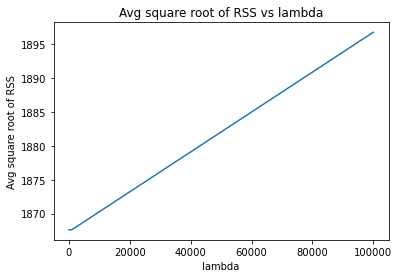

Plot of Average square root of RSS vs lambda taking attack_value, defense_value, and stamina feature:
  


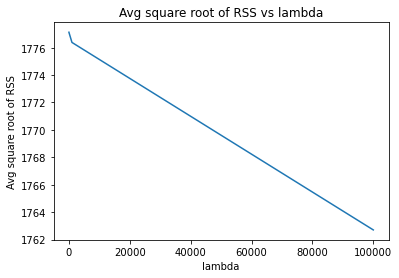

In [20]:
print("Plot of  Average square root of RSS vs lambda taking only attack_value feature:")
print ("  ")

plot_rss_vs_lambda(avg_sqrt_rss_values_1, lambda_values)

print("Plot of Average square root of RSS vs lambda taking attack_value, defense_value, and stamina feature:")
print ("  ")
plot_rss_vs_lambda(avg_sqrt_rss_values_2, lambda_values)

 On taking less features the average square root of RSS value is increasing. Regularization is also not that useful since features are less. 



### (vii) (Bonus, 0.5 point) Use linear regression with l1-norm regularization. Report your results. How do the estimated regression weights change when using the l1-norm regularization compared to the l2-norm regularization?
### Note: You can use an existing library for running linear regression with l1-norm regularization.

In [21]:
from sklearn import linear_model

def crossvalidation_l1_regularized(X_matrix, Y_matrix, nfolds, lmbd, print_vector=False, print_rss=False):
    fold_size=int(len(Y_matrix)/nfolds)+1
    rss_values=[]
    print (" ")
    print ("Taking regularization parameter lambda = {}".format(lmbd))
    print (" ")
    for i in range(0, len(Y_matrix), fold_size):
        if (i!=0):
#             print (i)
            X_train=np.concatenate((X_matrix[:i],X_matrix[i+fold_size:]))
            
            Y_train=np.concatenate((Y_matrix[:i],Y_matrix[i+fold_size:]))
            
            X_test=X_matrix[i:i+fold_size]
            
            Y_test=Y_matrix[i:i+fold_size]
#             print(X_train.shape)
#             print (Y_train.shape)
#             print(X_test.shape)
#             print(Y_test.shape)

        else:
            X_train=X_matrix[fold_size:]
            Y_train=Y_matrix[fold_size:]
            X_test=X_matrix[:+fold_size]
            Y_test=Y_matrix[:+fold_size]
#             print(X_train.shape)
#             print (Y_train.shape)
#             print(X_test.shape)
#             print(Y_test.shape)
        #Using  l1-norm regularization
        model=linear_model.Lasso(alpha=lmbd)
#         weight_matrix=get_weights_regularized(X_train,Y_train,lmbd)
        model.fit(X_train,Y_train)
        if print_vector:
            print ("The Parameter vector: {}".format(model.coef_))
#         print (weight_matrix)
        Y_pred=model.predict(X_test)
#         print (Y_pred)
        rss=get_root_rss(Y_pred,Y_test)
        rss_values.append(rss)
        if print_rss:
            print ("The square root of the residual sum of squares error (RSS) between the actual and predicted outcome variable for the fold number {} is {}".format(int(i/fold_size)+1,rss))
            print ("   ")
    avg_sqrt_rss=sum(rss_values)/len(rss_values)
    print ("The average square root of the residual sum of squares error (RSS) over all folds after randomly shuffling the data is: {}".format(avg_sqrt_rss))
    return avg_sqrt_rss

In [22]:
def get_avg_sqrt_rss_values_l1(X_matrix, Y_matrix, nfold, lambda_values, print_vector=False, print_rss=False):
    avg_sqrt_rss_values=[]
    for lmbd in lambda_values:
        val=crossvalidation_l1_regularized(X_matrix, Y_matrix, nfold, lmbd,print_vector, print_rss)
        avg_sqrt_rss_values.append(val)
    return avg_sqrt_rss_values

lambda_values=[0.1,1,10,100,1000]
avg_sqrt_rss_values_l1=get_avg_sqrt_rss_values_l1(X_matrix, Y_matrix, 5, lambda_values, print_vector=False, print_rss=False)

 
Taking regularization parameter lambda = 0.1
 
The average square root of the residual sum of squares error (RSS) over all folds after randomly shuffling the data is: 889.2245432364567
 
Taking regularization parameter lambda = 1
 
The average square root of the residual sum of squares error (RSS) over all folds after randomly shuffling the data is: 865.9645624049572
 
Taking regularization parameter lambda = 10
 
The average square root of the residual sum of squares error (RSS) over all folds after randomly shuffling the data is: 856.0970614191319
 
Taking regularization parameter lambda = 100
 
The average square root of the residual sum of squares error (RSS) over all folds after randomly shuffling the data is: 856.7070653691333
 
Taking regularization parameter lambda = 1000
 
The average square root of the residual sum of squares error (RSS) over all folds after randomly shuffling the data is: 885.3393057581586


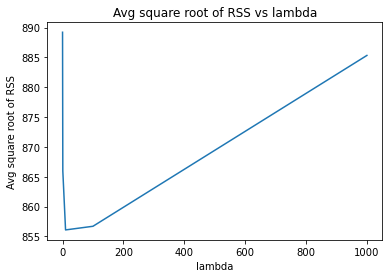

In [23]:
plot_rss_vs_lambda(avg_sqrt_rss_values_l1, lambda_values)

### Answer:

So here we can see that for the regularization parameter lambda = **100** we get the lowest value of average square root of RSS = **814.016**

Now to compare the estimated regression weights when using the l1-norm regularization compared to the l2-norm regularization we print the parameter vectors for $\lambda$=[0.1,100] for both the regularization parameters.

In [24]:
lambda_values=[0.1,100]
print (" ")
print ("Values of parameter vectors when taking l2-norm regularization")
print (" ")
get_avg_sqrt_rss_values(X_matrix, Y_matrix, 5, lambda_values, print_vector=True, print_rss=True)
print (" ")
print ("Values of parameter vectors when taking l1-norm regularization")
print (" ")
get_avg_sqrt_rss_values_l1(X_matrix, Y_matrix, 5, lambda_values, print_vector=True, print_rss=True)

 
Values of parameter vectors when taking l2-norm regularization
 
 
Taking regularization parameter lambda = 0.1
 
The Parameter vector: [-1.02186160e+03  5.61483422e+00  8.82664626e+00  4.60761821e+00
 -1.93893822e+02  1.61402489e+02  2.30634004e-01 -6.05896528e+01
 -3.08713213e+01 -3.29268703e+01 -3.73227053e+01 -1.03822410e+02
 -3.84141771e+01 -6.06756323e+01 -9.67384352e+01 -7.52286920e+01
 -7.21725398e+01 -1.00844870e+02 -6.90047629e+01 -9.16292338e+01
 -8.33952186e+01 -6.82250792e+01]
The square root of the residual sum of squares error (RSS) between the actual and predicted outcome variable for the fold number 1 is 1743.3143575995891
   
The Parameter vector: [-1.09487869e+03  3.38853214e+00  1.03543856e+01  5.41312955e+00
 -6.95708345e+01 -1.35439950e+02  2.21010890e-01 -6.23324808e+01
 -7.04986087e+01 -4.43791548e+01  9.55919710e+00 -1.07549819e+02
 -3.46743102e+01 -1.19121144e+02 -6.22682221e+01  1.85343577e+01
 -1.10106925e+02 -1.57563246e+02 -1.14723960e+02 -1.66383179e+02

[889.2245432364567, 856.7070653691333]

So from the above values we can see that the parameter vector values are generally larger for l1-norm regularization than for l2-norm regularization. This is expected as we are penalizing the weights more in l2-norm regularization.


### (viii) (1 point) Use the sample mean of the outcome to binarize the data. Run a logistic regression model to classify between low and high combat points. To evaluate the model, randomly split 80% of data into training and 20% into testing. Report the accuracy of the classifier on the test data.

### Note: you can use an existing library for running logistic regression from the available libraries. You can use the sklearn.linear model.LogisticRegression function setting the 'penalty' parameter to 'none'.

In [25]:
mean_combat_points=np.mean( Y_matrix, axis=0)
print ("Mean combat points = {}".format(mean_combat_points))

Mean combat points = 1577.650684931507


In [26]:
train_rows["binarized_combat_points"]=0

for i in range(len(train_rows)):
    if train_rows.loc[i,"combat_point"]>=mean_combat_points:
        train_rows.loc[i,"binarized_combat_points"]=1
    else:
        train_rows.loc[i,"binarized_combat_points"]=0

In [27]:
# train_rows.to_excel("new_df.xlsx")  

In [28]:
X_train=train_rows.loc[:,feature_set]
Y_train_new=train_rows.loc[:,"binarized_combat_points"]
X_matrix=X_train.to_numpy()
Y_matrix_new=Y_train_new.to_numpy()
X_matrix,Y_matrix_new=random_shuffle(X_matrix, Y_matrix_new)


In [124]:
from sklearn.linear_model import LogisticRegression

def calculate_accuracy(Y_test,Y_pred):
    length=len(Y_pred)
    acc=0
    for i, j in zip(Y_test,Y_pred):
        if i==j:
            acc+=1
    accuracy=acc/length
    return accuracy

def logistic_regression(X_matrix, Y_matrix,lmbd=1,penalty="none"):
    split_size=int(len(Y_matrix)*.8)




    X_train=X_matrix[:split_size]
    Y_train=Y_matrix[:split_size]
    X_test=X_matrix[split_size:]
    Y_test=Y_matrix[split_size:]
#     print(X_train.shape)
#     print (Y_train.shape)
#     print(X_test.shape)
#     print(Y_test.shape)
    if (penalty=="none"):
        model=LogisticRegression(penalty='none')
    elif (penalty=="l2"):
        model=LogisticRegression(penalty='l2',  max_iter = 100000, solver = 'newton-cg', C=(1/lmbd)) 
    model.fit(X_train, Y_train)
    Y_pred=model.predict(X_test)
    accuracy= calculate_accuracy(Y_test,Y_pred)
    return accuracy

In [125]:
print (logistic_regression(X_matrix, Y_matrix_new))

0.9


### Answer:

The sample mean of the outcome (1577.65) has been used to binarize the data. A logistic regression model has been trained to classify between low and high combat points. The model has been randomly shuffled and split 80% of data into training and 20% into testing.

The accuracy of the classifier on the test data is : **0.9**

### (ix) (1 point) Run a logistic regression model with regularization to classify between low and high combat points. Use the same training and testing split as in question (viii). Find the optimal regularization term using a 5-fold cross-validation on the training data. Use the regularization term that provided the best results from the cross-validation, and evaluate the regularized logistic regression on the test data. Report the final accuracy on the test data, as well as the best hyperparameter.

In [126]:
# def logistic_regression_l2(X_matrix, Y_matrix):
#     split_size=int(len(Y_matrix)*.8)




#     X_train=X_matrix[:split_size]
#     Y_train=Y_matrix[:split_size]
#     X_test=X_matrix[split_size:]
#     Y_test=Y_matrix[split_size:]
# #     print(X_train.shape)
# #     print (Y_train.shape)
# #     print(X_test.shape)
# #     print(Y_test.shape)
#     model=LogisticRegression(penalty='l2',  max_iter = 10000, solver = 'newton-cg', C=1)
#     model.fit(X_train, Y_train)
#     Y_pred=model.predict(X_test)
#     accuracy= calculate_accuracy(Y_test,Y_pred)
#     return accuracy

In [127]:
logistic_regression(X_matrix, Y_matrix_new, penalty='l2')

0.9666666666666667

### Answer:
A logistic regression model with regularization to classify between low and high combat points has been trained. Using the same training and testing split as in the previous question and using $\lambda=1$ we get a accuracy of **0.96**

In [128]:

def crossvalidation_logistic_regression(X_matrix, Y_matrix, nfolds, lmbd, print_vector=False, print_accuracy=False):
    fold_size=int(len(Y_matrix)/nfolds)+1
    acc_values=[]
    print (" ")
    print ("Taking regularization parameter lambda = {}".format(lmbd))
    print (" ")
    for i in range(0, len(Y_matrix), fold_size):
        if (i!=0):
#             print (i)
            X_train=np.concatenate((X_matrix[:i],X_matrix[i+fold_size:]))
            
            Y_train=np.concatenate((Y_matrix[:i],Y_matrix[i+fold_size:]))
            
            X_test=X_matrix[i:i+fold_size]
            
            Y_test=Y_matrix[i:i+fold_size]
#             print(X_train.shape)
#             print (Y_train.shape)
#             print(X_test.shape)
#             print(Y_test.shape)

        else:
            X_train=X_matrix[fold_size:]
            Y_train=Y_matrix[fold_size:]
            X_test=X_matrix[:+fold_size]
            Y_test=Y_matrix[:+fold_size]
#             print(X_train.shape)
#             print (Y_train.shape)
#             print(X_test.shape)
#             print(Y_test.shape)
        #Using  l2-norm regularization

        model=LogisticRegression(penalty='l2',  max_iter = 10000, solver = 'newton-cg', C=(1/lmbd))
        model.fit(X_train, Y_train)
        Y_pred=model.predict(X_test)
        accuracy= calculate_accuracy(Y_test,Y_pred)

        acc_values.append(accuracy)
        if print_accuracy:
            print ("The accuracy of the model for the fold number {} is {}".format(int(i/fold_size)+1,accuracy))
            print ("   ")
    avg_acc=sum(acc_values)/len(acc_values)
    print ("The average accuracy of the model over all folds after randomly shuffling the data is: {}".format(avg_acc))
    return  avg_acc

In [129]:
def get_acc_l2_logistic_regression(X_matrix, Y_matrix, nfold, lambda_values, print_vector=False, print_accuracy=False):
    avg_acc_values=[]
    for lmbd in lambda_values:
        val=crossvalidation_logistic_regression(X_matrix, Y_matrix, nfold, lmbd,print_vector, print_accuracy)
        avg_acc_values.append(val)
    return avg_acc_values

In [130]:
lambda_values=[0.0001,0.01,0.1,.5, 1,10,50, 100,1000,1500]

acc_values=get_acc_l2_logistic_regression(X_matrix, Y_matrix_new, 5, lambda_values, print_vector=False, print_accuracy=False)


    


 
Taking regularization parameter lambda = 0.0001
 
The average accuracy of the model over all folds after randomly shuffling the data is: 0.9800000000000001
 
Taking regularization parameter lambda = 0.01
 
The average accuracy of the model over all folds after randomly shuffling the data is: 0.9723076923076924
 
Taking regularization parameter lambda = 0.1
 
The average accuracy of the model over all folds after randomly shuffling the data is: 0.9800000000000001
 
Taking regularization parameter lambda = 0.5
 
The average accuracy of the model over all folds after randomly shuffling the data is: 0.9723076923076924
 
Taking regularization parameter lambda = 1
 
The average accuracy of the model over all folds after randomly shuffling the data is: 0.9723076923076924
 
Taking regularization parameter lambda = 10
 
The average accuracy of the model over all folds after randomly shuffling the data is: 0.9646153846153848
 
Taking regularization parameter lambda = 50
 
The average accuracy 

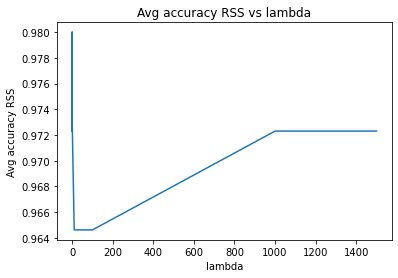

In [131]:
def plot_acc_vs_lambda(avg_acc_values, lambda_values):
    plt.figure(1)
    plt.plot(lambda_values,avg_acc_values )
    y_label="Avg accuracy RSS"
    x_label="lambda"
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title('{} vs {}'.format (y_label,x_label ))
    plt.show()

plot_acc_vs_lambda(acc_values, lambda_values)

### Answer: 

A 5-fold cross-validation on the training data has been implemented. From the graph and the values it can be seen the accuracy is highest (=**0.98**) at $\lambda$=0.0001 and $\lambda$=0.1. Using $\lambda$=0.1 for l2-norm regularization and evaluating the
regularized logistic regression on the test data we get:

In [132]:
logistic_regression(X_matrix, Y_matrix_new, penalty='l2',lmbd=0.1)

1.0

So:

1. The accuracy on the test dataset= 1.0
2. Best hyperparameter $\lambda$= 0.1